In [1]:
import os, sys

import IPython.display as ipd

path= '/Users/sbielfel/Nextcloud2/time_resolved/'
sys.path.append(path)
path= '/Users/sbielfel/Nextcloud2/phase_retrieval/algos/'
sys.path.append(path)
%load_ext autoreload
%autoreload 2

In [2]:
print(sys.executable)

/Users/sbielfel/anaconda3/envs/fml/bin/python


In [75]:
from occupancy import *
from plotting3d import *

In [11]:
# import h5py
import meteor
import reciprocalspaceship as rs
import numpy as np
import gemmi 
import ipywidgets as widgets
from scipy.ndimage import gaussian_filter
# from output_eval import *

In [5]:
%matplotlib ipympl
%matplotlib inline

In [6]:
loc = "../synthetic_cistrans/"
name_light = "100ps_withSIGFC_amplitudenoise.mtz"
name_dark = "trans_withSIGFC_amplitudenoise.mtz"
name_dark = "trans_sf.mtz"
name_light = "100ps_sfV2.mtz"
name_light = "100ps_sf.mtz"
ds_light = rs.read_mtz(loc+name_light)
ds_dark = rs.read_mtz(loc+name_dark)
ds_light, ds_dark

(                  FC        PHIC
 H  K L                          
 0  0 2   5099.616211         0.0
      4    180.751282  179.999985
      6    709.383118  180.000015
      8    752.830994  180.000015
      10   263.784851    0.000003
 ...              ...         ...
 32 5 5     23.879597  330.984344
    6 0      8.442408  180.000259
      1     46.126518   97.791443
      2     32.960667  197.921204
      3       40.5933  200.852386
 
 [31852 rows x 2 columns],
                   FC        PHIC
 H  K L                          
 0  0 2   5083.867676         0.0
      4    218.642731  179.999985
      6    738.122253  179.999985
      8    746.586731  180.000015
      10   290.741333    0.000002
 ...              ...         ...
 32 5 5      22.26017  334.031342
    6 0      8.205142  180.000229
      1     44.349613   98.977188
      2     32.996357  198.998627
      3     41.629765  200.730804
 
 [31852 rows x 2 columns])

In [7]:
print(ds_light.cell)
ds_light["sf"] = ds_light.to_structurefactor("FC", "PHIC")
f_light = ds_light.to_reciprocal_grid("sf")
ds_dark["sf"] = ds_dark.to_structurefactor("FC", "PHIC")
f_dark = ds_dark.to_reciprocal_grid("sf")
delta_fa_abs = np.abs(f_light)-np.abs(f_dark)

<gemmi.UnitCell(51.99, 62.91, 72.03, 90, 90, 90)>


In [8]:
alpha = 0.27
noise_level=0

(100, 120, 144)


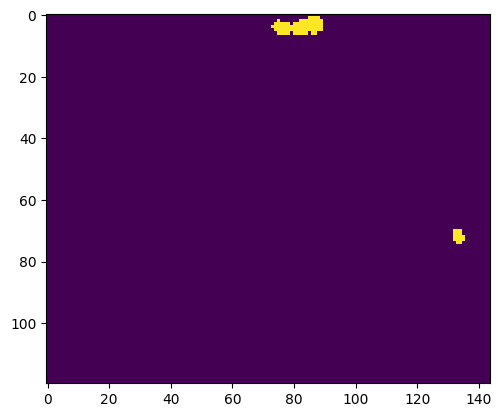

In [12]:
# flipped compared to normal order!!!
# np.flip(obj, (0,1,2)) to adjust
obj1 = np.real(np.fft.ifftn(f_light))
obj0 = np.real(np.fft.ifftn(f_dark))
obj_mix = alpha*obj1+(1-alpha)*obj0
delta_obj = obj1-obj0
mask_pks = gaussian_filter(np.abs(delta_obj),1)>0.01
print(delta_obj.shape)
plt.figure()
plt.imshow(mask_pks[7])

In [13]:
# def make_points2(frac_list, base_idx, imlen, masks = None):
    
#     delta = 1/imlen
#     other_idcs = [[1,2], [0,2], [0,1]][base_idx]
#     wk_list = frac_list
#     idx_list = np.array(np.round(wk_list[:,base_idx]/delta),int)
#     list_2d = []
#     for i in range(imlen):
#         if (idx_list == i).any():
#             indices = wk_list[idx_list == i][:,other_idcs].T
#         else:
#             indices = [[],[]]
#         # print(indices)
#         list_2d.append(indices)
#     if masks is None:
#         return list_2d
#     mask_slices = []
#     for i in range(imlen):
#         mask_slices.append(masks[idx_list == i])
#     return list_2d, mask_slices

# def make_extent(arr_shape, origin, delta):
#     opposite = arr_shape * delta + origin
#     d1 = delta[1] / 2
#     d2 = delta[2] / 2
#     extent = (origin[2] - d2, opposite[2] - d2, opposite[1] - d1, origin[1] - d1)
#     extent = (opposite[2] - d2, origin[2] - d2, origin[1] - d1, opposite[1] - d1)
#     return extent


In [14]:
count=0
pdbname_light = loc+"100ps.pdb"
struc_light = gemmi.read_structure(pdbname_light)
print(struc_light.cell)
print(ds_light.cell)
# struc_light.remove_hydrogens()
# struc_light.remove_waters()
# struc_light.remove_empty_chains()

pdbname_dark = loc + "trans.pdb"
struc_dark = gemmi.read_structure(pdbname_dark)
# struc_dark.remove_hydrogens()
# struc_dark.remove_waters()
# struc_dark.remove_empty_chains()
pos_list = np.array([(rca.atom.pos).tolist()   for rca in struc_light[0].all()])
for idx in range(3):
    diff = np.max(pos_list[:,idx])-np.min(pos_list[:,idx])
    print(diff)

struc_dark.spacegroup_hm

<gemmi.UnitCell(51.99, 62.91, 72.03, 90, 90, 90)>
<gemmi.UnitCell(51.99, 62.91, 72.03, 90, 90, 90)>
42.325
56.648
54.731


'P 21 21 21'

Text(0.5, 0, 'Occupancy')

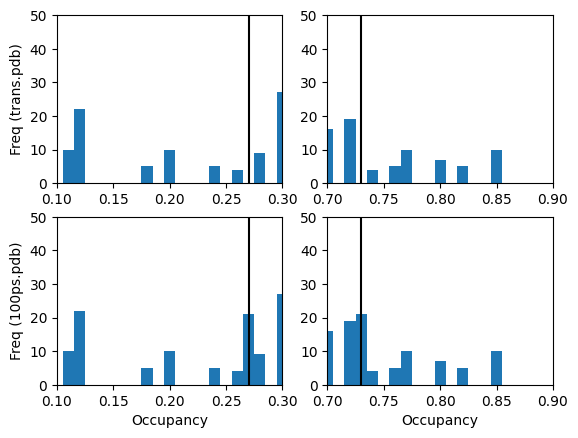

In [15]:
plt.close("all")
fig, axs = plt.subplots(2,2)
ax =axs[0,0]
bins = np.linspace(0.005,1.005,101)
for ax in axs.flat:
    ax.axvline(alpha,color="k")
    ax.axvline(1-alpha,color="k")
    ax.set_ylim(0,50)
    
ax =axs[0,0]
ax.hist([np.round(x.atom.occ,2) for x in struc_dark[0].all()], bins = bins)
ax.set_xlim(.1,.3)
ax.set_ylabel("Freq (trans.pdb)")

ax =axs[1,0]
ax.hist([np.round(x.atom.occ,2) for x in struc_light[0].all()], bins = bins)
ax.set_xlim(.1,.3)
ax.set_ylabel("Freq (100ps.pdb)")
ax.set_xlabel("Occupancy")

ax =axs[0,1]
ax.hist([np.round(x.atom.occ,2) for x in struc_dark[0].all()], bins = bins)
ax.set_xlim(.7,.9)

ax =axs[1,1]
ax.hist([np.round(x.atom.occ,2) for x in struc_light[0].all()], bins = bins)
ax.set_xlim(.7,.9)
ax.set_xlabel("Occupancy")


In [16]:
# def mtz_comp(locs, mask, mtzdata, gif_name="", extent=None):
#     startval=10
#     kk=0
#     # d2_points = make_points(frac_list, kk, len(mtzdata))
#     d2_points, d2_mask = make_points2(frac_list, kk, len(mtzdata), mask)
#     # d2_points = np.array(d2_points)
#     xlen, ylen, zlen = mtzdata.shape
#     zline = np.linspace(0,1,zlen)
#     xline = np.linspace(0,1,xlen)
#     plines = []
#     fig = plt.figure(figsize=(7,6))
#     ax=fig.add_subplot()
#     ax.set_title(xline[0])
#     mvals = np.unique(mask)
#     # delta = 1/np.array(mtzdata.shape)
#     # origin= np.zeros(3)
#     # extent = make_extent(mtzdata.shape, origin, delta,)
#     plt.xlim(0,1)
#     plt.ylim(0,1)
#     extent = [1,0,0,1] if extent is None else extent
#     # im.set_extent(extent)
#     im = plt.imshow(mtzdata[startval],extent= extent)
#     labels = ["main", "Cis","Trans"]
#     marks = [".", "o","o"]
#     color = ["cyan", "red","orange"]
    
#     for boo in mvals:
#         pline, = plt.plot(d2_points[startval][1][boo==d2_mask[startval]], 
#                           d2_points[startval][0][boo==d2_mask[startval]], 
#                           label=labels[int(boo)], linestyle="", 
#                           marker=marks[int(boo)], c=color[int(boo)], alpha=0.8)
#         plines.append(pline)
    
    
#     nline = np.linspace(0,1, len(xline))
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#     @widgets.interact(f0=(0, len(xline) - 1, 1))
#     def update(f0=0):
#         # divline.set_ydata(zloc[:,xline ==xline[f0]])
#         # divline2.set_ydata(zloc2[:,xline ==xline[f0]])
#         im.set_data(mtzdata[f0])
#         ax.set_title(f"z={xline[f0]:.3f}")
#         for i,boo in enumerate(mvals):
#             plines[i].set_data(
#                 d2_points[f0][1][boo==d2_mask[f0]], 
#                 d2_points[f0][0][boo==d2_mask[f0]], 
#             )
#     # return fig 
#     if gif_name != "":
#         anim = animation.FuncAnimation(
#                 fig, update, frames=len(xline), interval=500
#             )
#         anim.save(gif_name)
#         plt.show()
#         return anim

interactive(children=(IntSlider(value=0, description='f0', max=99), Output()), _dom_classes=('widget-interact'…

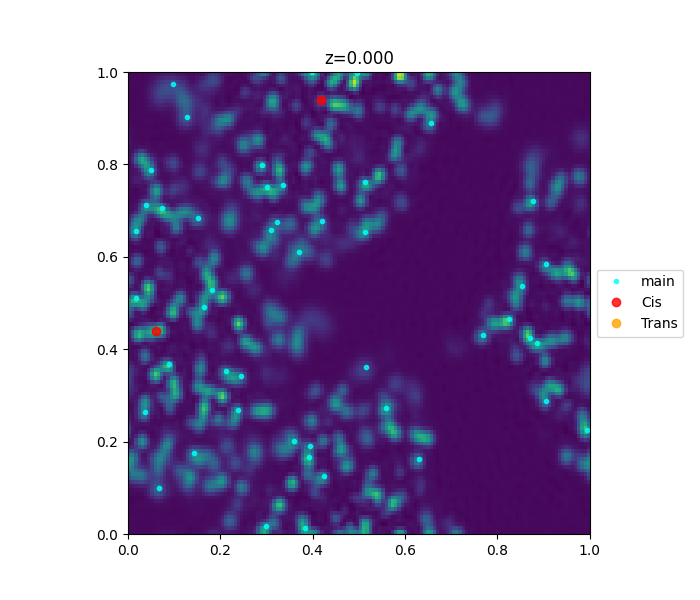

In [22]:
prefactors = np.array([
    [1,1,1], 
    [-1,-1, 1],
    [1, -1,-1],
    [-1,1,-1],
])
translation = np.array([
    [0,0,0],
    [1,0,1],
    [1,1,0],
    [0,1,1],
])/2
frac_test = np.array([
    [0.1, 0.2, 0.3],
    [0.2, 0.2, 0.3],
    [0.3, 0.2, 0.3],
    [0.9, 0.2, 0.3],
    ]
                    )
    
pos_list = np.array([struc_light.cell.fractionalize(rca.atom.pos).tolist()   for rca in struc_light[0].all()])
frac_list = pos_list% 1

frac_add = [translation[ii] + prefactors[ii]*frac_list for ii in range(4)]
frac_list = np.concatenate(frac_add, axis=0)
frac_list = frac_list % 1
obj1[::-1]

occurences = np.array([np.round(x.atom.occ,2) for x in struc_light[0].all()])
occ_mask = 1*(occurences == 0.27) + 2 * (occurences == 0.73)
occ_mask = np.tile(occ_mask, (4))
mtz_comp(frac_list,occ_mask,  np.flip(obj1,(0,1,2)),extent=[0,1,1,0], gif_name="")

interactive(children=(IntSlider(value=0, description='f0', max=99), Output()), _dom_classes=('widget-interact'…

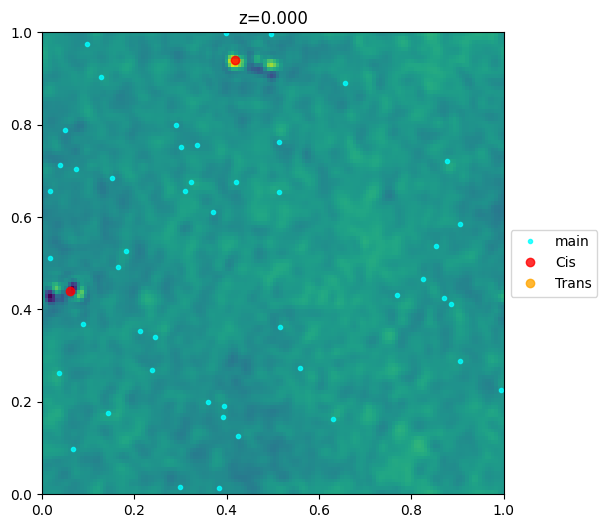

In [124]:

mtz_comp(frac_list,occ_mask,  np.flip(delta_obj,(0,1,2)),extent=[0,1,1,0])


interactive(children=(IntSlider(value=0, description='f0', max=99), Output()), _dom_classes=('widget-interact'…

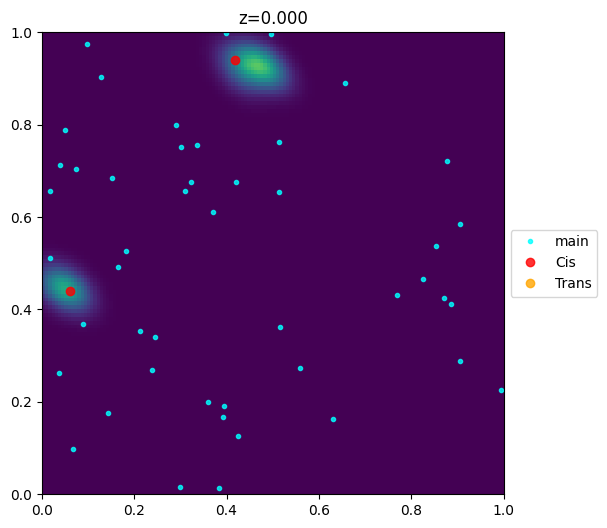

In [125]:
from scipy import stats
def make_blurred(frac_pos, grid_shape,radius= .01):
    frac_pos = frac_pos.T
    X, Y, Z = np.mgrid[
        0 : 1 : grid_shape[0] * 1j,
        0 : 1 : grid_shape[1] * 1j,
        0 : 1 : grid_shape[2] * 1j,
    ]
    grid = np.vstack([X.ravel(), Y.ravel(), Z.ravel()])

    kernel = stats.gaussian_kde(frac_pos, radius)
    density = np.reshape(kernel(grid).T, X.shape)
    return density
out = make_blurred(frac_list[occ_mask>0],obj1.shape, radius=0.1)

extent = [0,1,1,0]
extent = [1,0,0,1]
out = np.flip(out,(0,1,2))
mtz_comp(frac_list,occ_mask, out[::-1], extent=extent)


interactive(children=(IntSlider(value=0, description='f0', max=99), Output()), _dom_classes=('widget-interact'…

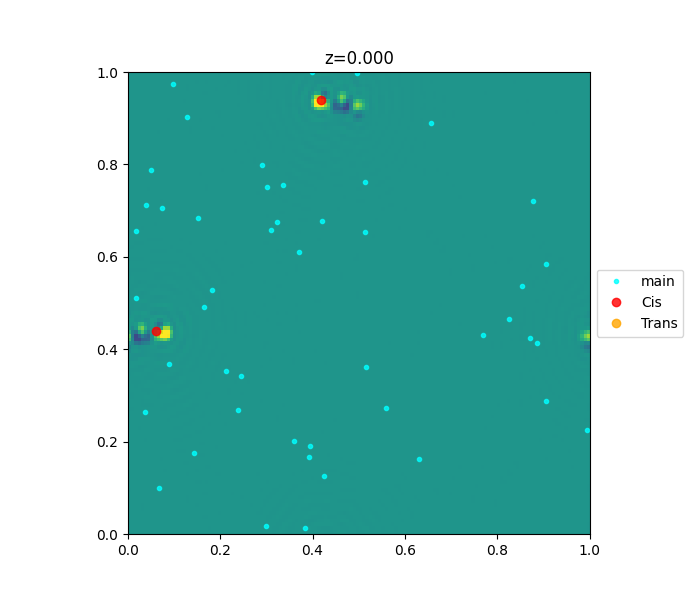

In [40]:
mtz_comp(frac_list,occ_mask, delta_obj)


## Angle Approximation Check

In [126]:
np.sum(np.abs(delta_fa_abs)) / np.sum(np.abs(f_dark))

np.float64(0.06467837392531577)

In [127]:
alpha_xtrs = np.linspace(0,1,20)+1e-10
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=2, noise_level = 0)
corr_x8 = x8_inspired(np.abs(f_dark),np.abs(f_light), np.abs(f_xtrs))

In [37]:
fofo

NameError: name 'fofo' is not defined

In [38]:
slice_3d(delta_obj)


NameError: name 'slice_3d' is not defined

interactive(children=(IntSlider(value=0, description='ix', max=99), Output()), _dom_classes=('widget-interact'…

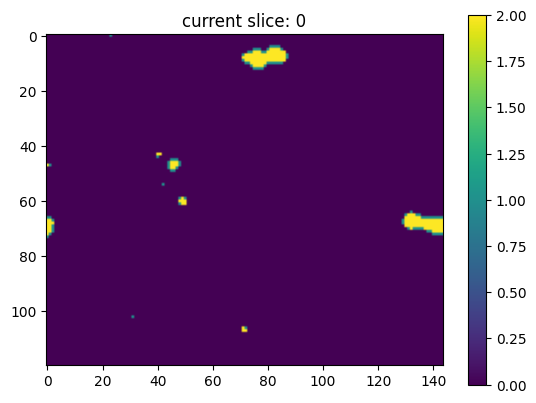

In [128]:
mask_pks_filt = gaussian_filter(np.array(mask_pks,float), 1)>.2
slice_3d(mask_pks_filt+np.array(mask_pks,float))

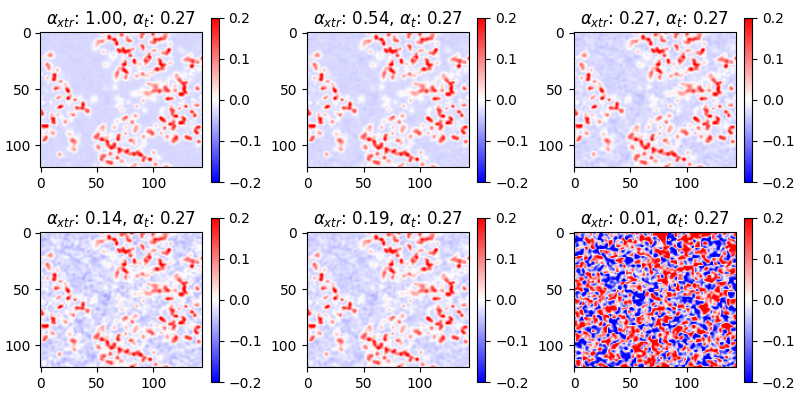

interactive(children=(IntSlider(value=15, description='f0', max=99), Output()), _dom_classes=('widget-interact…

In [57]:
def show_xtrs(version="only"):
    alphax = 0.27
    alpha_xtrs_vis = np.array([1, alphax*2, alphax, alphax/2,0.19, 0.01])
    f_xtrs = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
    dens_xtrs, neg_sum = marius(f_xtrs)
    fig, axs = plt.subplots(2,3, figsize=(8,4),constrained_layout=True)
    ims = []
    dens_mod = []
    # match version:
    #     case "only":
    #         obj_mod = obj0 
    #     case "diff":
    #         obj_mod = obj0 
    #     case "diffnorm":
    obj_mod = obj0/np.max(obj0)
    dens_mod = [(arr/np.max(arr))
    for ax, alpha_xtr, arr in zip(axs.flat, alpha_xtrs_vis,dens_xtrs):
        raw = [r"$\alpha_{xtr}$",
               r"$\alpha_t$"]
        tit = f"{raw[0]}: {alpha_xtr:.2f}, {raw[1]}: {alphax:.2f}"
        ax.set_title(tit)
        idx = 15
        vmax = .2
        # vmax = np.max(arr[idx])
        im = ax.imshow((arr[idx]), cmap="bwr",vmin=-vmax,vmax=vmax )
        ims.append(im)
        plt.colorbar(im)
        # fig.suptitle(title + f" z={f0}/{imlen-1}", fontsize=16)    
    plt.show()    
    @widgets.interact(f0=(0, f_xtrs.shape[1] - 1, 1))
    def update(
        f0=idx,
    ):
        for dens, imo in zip(dens_mod, ims):
            imo.set_data((dens[f0])-obj_mod[f0])

    make_gif = False
    if make_gif:
        interval = make_gif if not isinstance(make_gif, int) else 1000
        anim = animation.FuncAnimation(
            fig, update, frames=np.arange(0, f_xtrs.shape[1]), interval=interval
        )
        anim.save("densities.gif")
        return anim
%matplotlib widget
anim = show_xtrs()

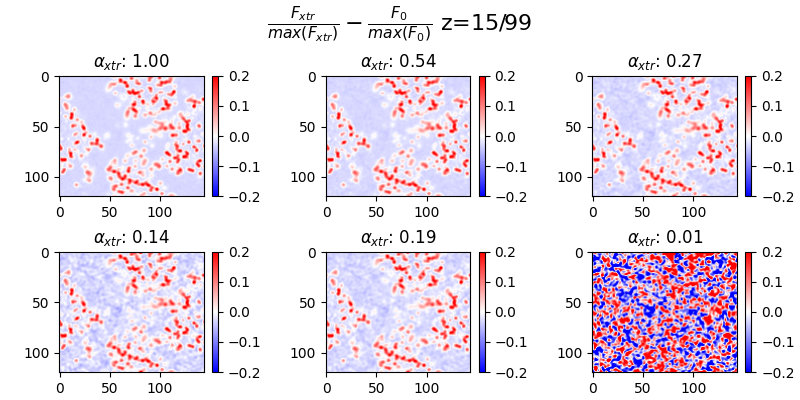

interactive(children=(IntSlider(value=15, description='f0', max=99), Output()), _dom_classes=('widget-interact…

MovieWriter ffmpeg unavailable; using Pillow instead.


In [76]:
def show_xtrs( version="only",  make_gif = False, ):
    alphax = 0.27
    alpha_xtrs_vis = np.array([1, alphax*2, alphax, alphax/2,0.19, 0.01])
    f_xtrs = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
    dens_xtrs, neg_sum = marius(f_xtrs)
    fig, axs = plt.subplots(2,3, figsize=(8,4),constrained_layout=True)
    imlen  = f_xtrs.shape[1]
    ims = []
    match version:
        case "only":
            obj_mod = obj0 
            dens_mod = dens_xtrs
            title = r"$F_{xtr}$"
            fname="cistrans_fxtr.gif"
        case "diff":
            obj_mod = obj0 
            dens_mod = dens_xtrs - obj0
            title = r"$F_{xtr} -  F_0$"
            fname="cistrans_diff.gif"
        case "diffnorm":
            obj_mod = obj0/np.max(obj0)
            dens_mod = [dens/np.max(dens) - obj_mod for dens in dens_xtrs]
            title = r"$\frac{F_{xtr}}{max(F_{xtr})} -  \frac{F_0}{max(F_0)}$"
            fname="cistrans_diffnorm.gif"
        case "diffnorm2":
            obj_mod = obj0/np.max(obj0)
            dens_mod = [dens/np.max(dens) - obj_mod for dens in dens_xtrs]
            title = r"$\frac{F_{xtr}}{max(F_{xtr}} -  \frac{F_0}{max(F_0}$"
            fname="cistrans_diffnorm2.gif"
        case _:
            raise UndefinedError
    for ax, alpha_xtr, arr in zip(axs.flat, alpha_xtrs_vis,dens_xtrs):
        raw = [r"$\alpha_{xtr}$",
               r"$\alpha_t$"]
        tit = f"{raw[0]}: {alpha_xtr:.2f}"
        ax.set_title(tit)
        idx = 15
        vmax = .2
        im = ax.imshow((arr[idx]), cmap="bwr",vmin=-vmax,vmax=vmax )
        ims.append(im)
        plt.colorbar(im)
    fig.suptitle(title + f" z={idx}/{imlen-1}", fontsize=16)    
    plt.show()    
    @widgets.interact(f0=(0, f_xtrs.shape[1] - 1, 1))
    def update(
        f0=idx,
    ):
        for dens, imo in zip(dens_mod, ims):
            imo.set_data(dens[f0])
        fig.suptitle(title + "\t "+ r"$\alpha_{true}" + f"={alpha}$\t z={f0}/{imlen-1}", fontsize=16)    

    if make_gif:
        interval = make_gif if not isinstance(make_gif, int) else 1000
        anim = animation.FuncAnimation(
            fig, update, frames=np.arange(0, f_xtrs.shape[1]), interval=interval
        )
        anim.save("gifs/"+fname)
        return anim
%matplotlib widget
anim = show_xtrs("diffnorm", True)


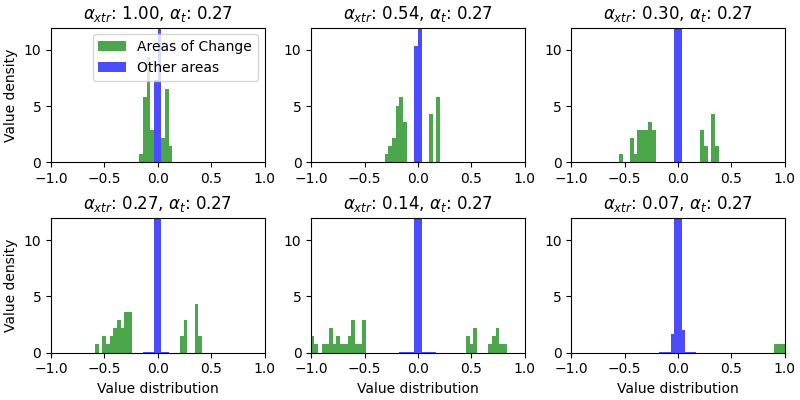

In [25]:
def show_xtrs():
    alphax = 0.27
    alpha_xtrs_vis = np.array([1, alphax*2, 0.3, alphax, alphax/2,alphax/4])
    f_xtrs = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
    dens_xtrs, neg_sum = marius(f_xtrs)
    fig, axs = plt.subplots(2,3, figsize=(8,4),constrained_layout=True)
    ims = []
    for ax, alpha_xtr, arr in zip(axs.flat, alpha_xtrs_vis,dens_xtrs):
        raw = [r"$\alpha_{xtr}$",
               r"$\alpha_t$"]
        tit = f"{raw[0]}: {alpha_xtr:.2f}, {raw[1]}: {alphax:.2f}"
        ax.set_title(tit)
        ax.set_ylim(0,12)
        ax.set_xlim(-1,1)
        bins = np.linspace(np.min(arr), np.max(arr), 30)
        bins = np.linspace(np.min(dens_xtrs), np.max(dens_xtrs), 100)
        arr = arr-obj0
        ax.hist(arr[mask_pks],color="green", alpha=0.7, density=True, bins= bins, label="Areas of Change")
        ax.hist(arr[~mask_pks], color = "blue", alpha=0.7, density=True, bins= bins, label = "Other areas")
        # fig.suptitle(title + f" z={f0}/{imlen-1}", fontsize=16)    
    axs[0,0].legend()
    for ax in [axs[0,0],axs[1,0]]:
        ax.set_ylabel("Value density")
    for ax in axs[1]:
        ax.set_xlabel("Value distribution")
    
%matplotlib widget
show_xtrs()


In [140]:
alpha_invs = (np.arange(0,20)+1e-10)
alpha_xtrs = 2/alpha_invs
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = noise_level)
dens_xtrs, neg_sum = marius(f_xtrs)


In [141]:
print(alpha)

0.27


0.27


Text(0.5, 1.0, "'Marius Method' with Alisia's test set")

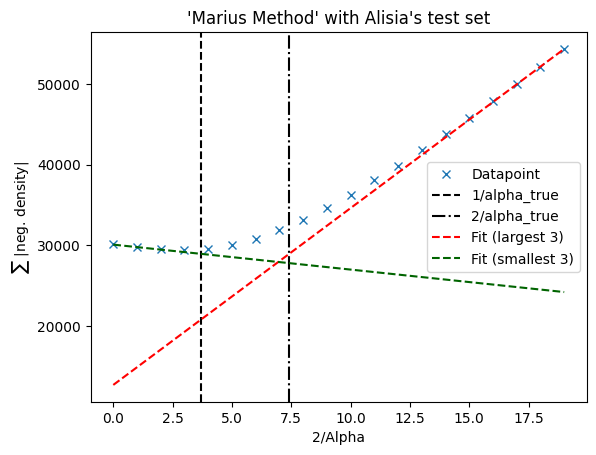

In [142]:
from scipy import stats
n_largest = 3
m1 = alpha_invs>alpha_invs[-n_largest]
m2 = alpha_invs<alpha_invs[n_largest]
res_1 = stats.linregress(alpha_invs[m1], -neg_sum[m1])
res_2 = stats.linregress(alpha_invs[m2], -neg_sum[m2])
# res_11 = stats.linregress(alpha_invs[m11], -neg_sum[m11])
# res_22 = stats.linregress(alpha_invs[m22], -neg_sum[m22])

alpha_line = np.linspace(np.min(alpha_invs), np.max(alpha_invs),5,)

plt.figure()
plt.plot(alpha_invs,neg_sum*-1, "x",  label="Datapoint")
plt.axvline(1/alpha,c="k",linestyle="--", label="1/alpha_true")
plt.axvline(2/alpha,c="k",linestyle="-.", label="2/alpha_true")


plt.plot(alpha_line, res_1.intercept+res_1.slope*alpha_line,c="red",linestyle="--", label=f"Fit (largest {n_largest})")
plt.plot(alpha_line, res_2.intercept+res_2.slope*alpha_line, c="darkgreen",linestyle="--",label=f"Fit (smallest {n_largest})")
# plt.plot(alpha_line, res_11.intercept+res_11.slope*alpha_line,c="purple",linestyle="--", label="Fit (all larger )")
plt.legend()
# plt.plot(alpha_line, res_22.intercept+res_22.slope*alpha_line, c="purple",linestyle="--")
# plt.ylim(20,40)
print(alpha)
plt.xlabel("2/Alpha")
plt.ylabel(r"$\sum$ |neg. density|")
plt.title("'Marius Method' with Alisia's test set")
# plt.savefig("mariusmethod.png")

In [180]:
from occupancy import  x8_density_map_fdiff_norm

alpha_xtrs = np.linspace(5e-2,1,100 )

f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
peak_sum, real_CC = x8_density_map_f1(f_xtrs, mask_pks, obj0, delta_obj)
peak_sum_diff, real_CC_diff = x8_density_map_fdiff(f_xtrs, mask_pks, obj0, delta_obj)
peak_sum_diffnorm, real_CC_diffnorm = x8_density_map_fdiff_norm(f_xtrs, mask_pks, obj0, delta_obj)


Text(0.5, 0, 'occupancy')

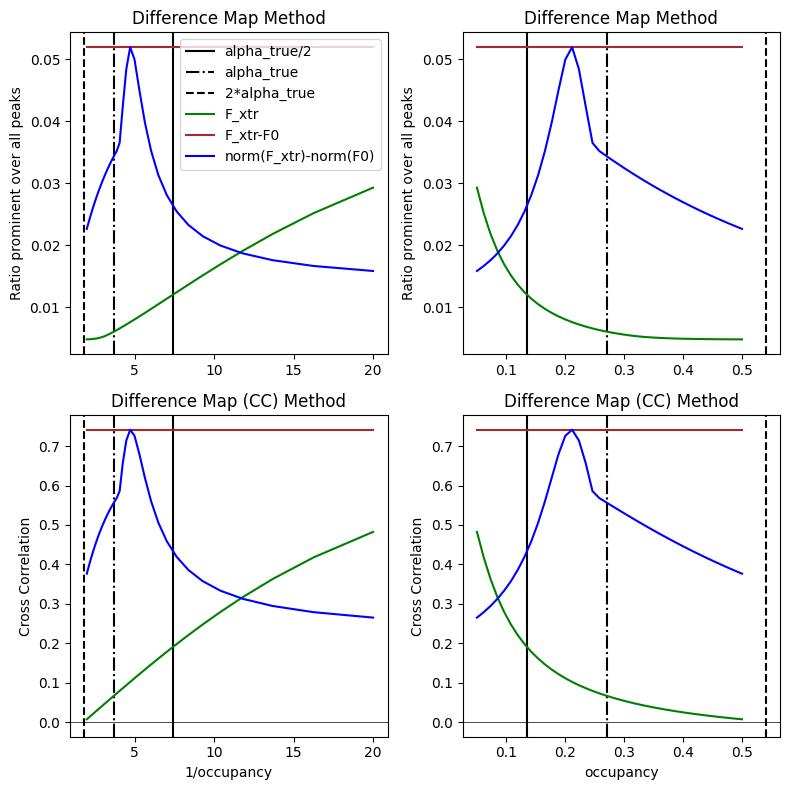

In [179]:
fig, axs = plt.subplots(2,2, figsize=(8,8),tight_layout=True)
for ax in axs[0] :
    ax.set_ylabel("Ratio prominent over all peaks")
    ax.set_title("Difference Map Method")
    
for ax in axs[:,0] :
    ax.axvline(1/(alpha/2),c="k", linestyle="-", label="alpha_true/2")
    ax.axvline(1/alpha,c="k", linestyle="-.", label="alpha_true")
    ax.axvline(1/(alpha*2),c="k", linestyle="--", label="2*alpha_true")
    
for ax in axs[:,1] :
    ax.axvline(alpha/2,c="k", linestyle="-", label="alpha_true/2")
    ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
    ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
    
for ax in axs[1] :
    ax.axhline(0,c="k", linewidth=.5, )
    ax.set_ylabel("Cross Correlation")
    ax.set_xlabel("Alphas")
    ax.set_title("Difference Map (CC) Method")

ax = axs[0,0]
ax.plot(1/alpha_xtrs,peak_sum, label=r"F_xtr",color="g")
ax.plot(1/alpha_xtrs,peak_sum_diff, label=r"F_xtr-F0",color="brown")
ax.plot(1/alpha_xtrs,peak_sum_diffnorm, label=r"norm(F_xtr)-norm(F0)",color="b")
ax.legend()

ax = axs[0,1]
ax.plot(alpha_xtrs,peak_sum, label=r"$\phi_{0}$",color="g")
ax.plot(alpha_xtrs,peak_sum_diff, label=r"$\phi_{0}$",color="brown")
ax.plot(alpha_xtrs,peak_sum_diffnorm, label=r"norm(F_xtr)-norm(F0)",color="b")

ax = axs[1,0]
ax.plot(1/alpha_xtrs,real_CC, label=r"$\phi_{0}$",color="g")
ax.plot(1/alpha_xtrs,real_CC_diff, label=r"F_xtr-F0",color="brown")
ax.plot(1/alpha_xtrs,real_CC_diffnorm, label=r"norm: F_xtr-F0",color="b")
ax.set_xlabel("1/occupancy")

ax = axs[1,1]
ax.plot(alpha_xtrs,real_CC,  label=r"F_xtr"    ,    color="g")
ax.plot(alpha_xtrs,real_CC_diff, label=r"F_xtr-F0",color="brown")
ax.plot(alpha_xtrs,real_CC_diffnorm, label=r"norm: F_xtr-F0",color="b")
ax.set_xlabel("occupancy")


In [167]:
pk_val = alpha_xtrs[np.argmax(peak_sum_diffnorm)]
pk_val


np.float64(0.19026845637583895)

In [23]:
alpha_chosen = np.array([0.01, pk_val, alpha, 0.8])

# copy from make_f_xtr
delta_f = (np.abs(f_light) - np.abs(f_dark))
delta_f_with_phase = delta_f * np.exp(1j * np.angle(f_dark))

# math
f_proposed = 2/alpha_chosen[ii]*(delta_f_with_phase)+f_dark
rho_proposed = np.fft.ifft2(f_proposed).real
rho_proposed = (rho_proposed/np.max(rho_proposed) + obj0/np.max(obj0))/2
rho_proposed_list.append(rho_proposed)
# end math

tit = [f"alpha = {aa:.2f}" for aa in alpha_chosen]
titles =  ["$F_1$", *tit, "$F_0$",]
lims = (80,150)
fig, axso = plt.subplots(2,6, figsize=(13,4))
rho_proposed_list = []
for axs in axso:
    ax= axs[0]
    ax.imshow(obj1/np.max(obj1), cmap="bwr", vmin=-1,vmax=1)
    for ii,ax in enumerate(axs[1:-1]):
        

        # math
        f_proposed = 2/alpha_chosen[ii]*(delta_f_with_phase)+f_dark
        rho_proposed = np.fft.ifft2(f_proposed).real
        rho_proposed = (rho_proposed/np.max(rho_proposed) + obj0/np.max(obj0))/2
        rho_proposed_list.append(rho_proposed)
        # end math

        ax.imshow(rho_proposed, cmap="bwr", vmin=-1,vmax=1)
    ax= axs[-1]
    ax.imshow(obj0/np.max(obj0), cmap="bwr", vmin=-1,vmax=1)
for ii,ax in enumerate( axso[0]):
    ax.set_title(titles[ii])
    ax.set_xlim(*lims)
    ax.set_ylim(*lims)
for ii,ax in enumerate( axso[1,1:-1]):
    
    cc0 = pearsonr(rho_proposed_list[ii].flatten(), obj0.flatten())[0]
    cc1 = pearsonr(rho_proposed_list[ii].flatten(), obj1.flatten())[0]
    
    cc0 = pearsonr(rho_proposed_list[ii][mask_pks], obj0[mask_pks])[0]
    cc1 = pearsonr(rho_proposed_list[ii][mask_pks], obj1[mask_pks])[0]
    ax.set_xlabel(f"$CC_0$: {cc0:.2f}\n$CC_1$: {cc1:.2f}")

axso[0,0].set_ylabel("Zoom")
axso[1,0].set_ylabel("Full view")


NameError: name 'pk_val' is not defined

In [24]:
delta_obj = obj1-obj0
mask_pks = gaussian_filter(np.abs(delta_obj),1)>0.01
mask_pks_strict = gaussian_filter(np.abs(delta_obj),1)>0.01
mask_pks_lax = gaussian_filter(np.abs(delta_obj),1)>0.005
mask_pks_filt = gaussian_filter(np.array(mask_pks,float), 1)>.9
mask_pks = np.abs(delta_obj)>0.06
slice_3d(delta_obj, cmap='bwr',vmin=-np.max(delta_obj), vmax=np.max(delta_obj))
slice_3d(mask_pks_lax)
# ([delta_obj,mask_pks_filt],rows=1, cols=2)


NameError: name 'slice_3d' is not defined

In [100]:
alpha_xtrs = np.linspace(5e-2,1,30 )

f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
mean_local_strict, mean_global_strict = pandda(f_dark, f_xtrs, mask_pks)
# mean_local_lax, mean_global_lax = pandda(f_dark, f_xtrs, mask_pks_lax)


In [103]:
mean_local_strict, mean_global_strict = pandda(f_dark, f_xtrs, mask_pks)


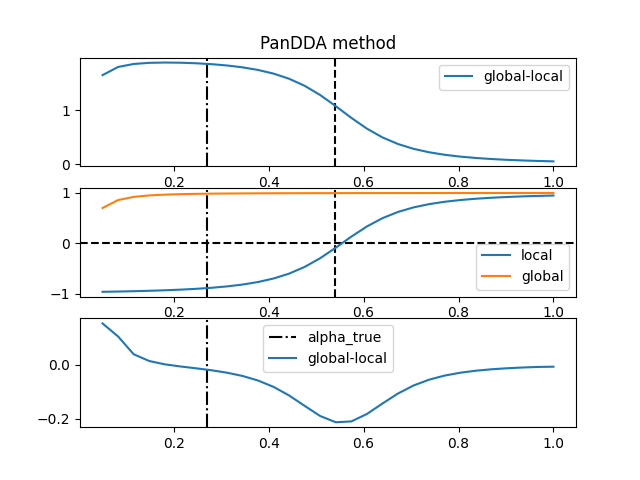

In [104]:
mean_local, mean_global =  mean_local_strict, mean_global_strict
# mean_local, mean_global =  mean_local_lax, mean_global_lax
fig, axs = plt.subplots(3)
ax = axs[0]
ax.axvline(alpha,c="k", linestyle="-.", )
# ax.axvline(alpha/2,c="k", linestyle="-",)
ax.axvline(alpha*2,c="k", linestyle="--")
ax.plot(alpha_xtrs,+mean_global-mean_local, label="global-local") 
# ax.set_ylim(0.7,1.1)
ax.legend()
ax.set_title("PanDDA method")
ax = axs[1]
# ax.axvline(alpha/2,c="k", linestyle="-",)
ax.axvline(alpha,c="k", linestyle="-.", )
ax.axvline(alpha*2,c="k", linestyle="--")
ax.axhline(0,c="k", linestyle="--")
ax.plot(alpha_xtrs,mean_local, label="local") 
ax.plot(alpha_xtrs, mean_global,label="global")
ax.legend()
ax = axs[2]
# ax.axvline(alpha/2,c="k", linestyle="-", label="1/2*alpha_true")
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
# ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.plot(alpha_xtrs,+np.gradient(mean_global-mean_local), label="global-local") 
ax.legend()


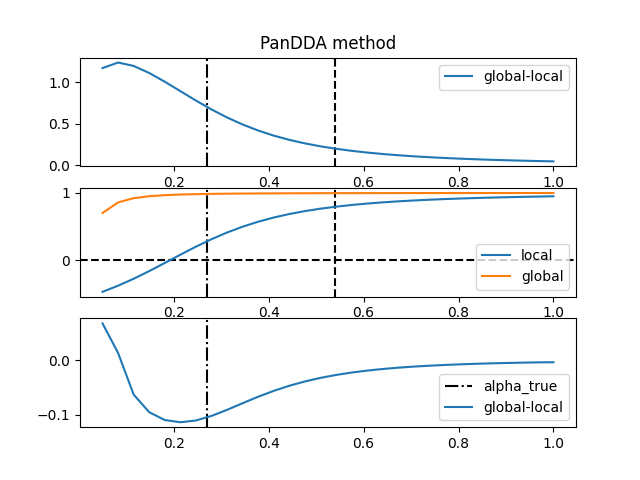

In [101]:
# mean_local, mean_global =  mean_local_strict, mean_global_strict
mean_local, mean_global =  mean_local_lax, mean_global_lax
fig, axs = plt.subplots(3)
ax = axs[0]
ax.axvline(alpha,c="k", linestyle="-.", )
# ax.axvline(alpha/2,c="k", linestyle="-",)
ax.axvline(alpha*2,c="k", linestyle="--")
ax.plot(alpha_xtrs,+mean_global-mean_local, label="global-local") 
# ax.set_ylim(0.7,1.1)
ax.legend()
ax.set_title("PanDDA method")
ax = axs[1]
# ax.axvline(alpha/2,c="k", linestyle="-",)
ax.axvline(alpha,c="k", linestyle="-.", )
ax.axvline(alpha*2,c="k", linestyle="--")
ax.axhline(0,c="k", linestyle="--")
ax.plot(alpha_xtrs,mean_local, label="local") 
ax.plot(alpha_xtrs, mean_global,label="global")
ax.legend()
ax = axs[2]
# ax.axvline(alpha/2,c="k", linestyle="-", label="1/2*alpha_true")
ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
# ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
ax.plot(alpha_xtrs,+np.gradient(mean_global-mean_local), label="global-local") 
ax.legend()


ValueError: x and y must have same first dimension, but have shapes (50,) and (20,)

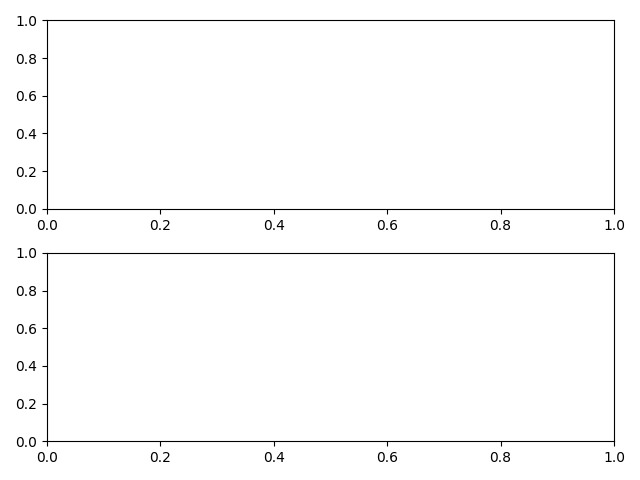

In [210]:
fig, axs = plt.subplots(2, tight_layout=True)
ax = axs[0]
ax.plot(alpha_xtrs,corr_x8, label="CC($|F_{light}|-|F_{dark}|, |F_{extr}| - |F_{dark}|$)")
ax.axvline(alpha,c="k", linestyle="-.", label="True alpha")
ax.axhline(0,c="k", linewidth=.5, )
ax.legend()
ax.set_ylabel("Cross Correlation")
ax.set_title("Cross Correlation Fourier Space")
ax = axs[1]

ax.plot(alpha_xtrs,np.gradient(corr_x8), label="CC($|F_{light}|-|F_{dark}|, |F_{extr}| - |F_{dark}|$)")
ax.axvline(alpha,c="k", linestyle="-.", label="True alpha")
# ax.axvline(alpha/2,c="k", linestyle="-.", label="True alpha/2")
# ax.legend()
ax.set_xlabel("Alpha")
ax.set_ylabel("Gradient of CC")

In [ ]:
slice_3d(mask_pks)